In [1]:
import pandas as pd

cve_data = pd.read_excel("extracted_cve_data.xlsx")


In [74]:
cve_data.head()

,CVE_ID,ASSIGNER,Description,Problem_Type,Published_Date,Last_Modified_Date,CVSS_v3_Base_Score,CVSS_v3_Vector_String,Confidentiality_Impact_v3,Integrity_Impact_v3,...,Access_Complexity_v2,Authentication_v2,Confidentiality_Impact_v2,Integrity_Impact_v2,Availability_Impact_v2,Exploitability_Score_v2,Configurations,Reference_Data,POS_Tags,NER
0,CVE-2011-0001,secalert@redhat.com,Double free vulnerability in the iscsi_rx_hand...,NaN,2011-03-15T17:55Z,2023-11-07T02:06Z,NaN,NaN,NaN,NaN,...,LOW,NaN,NONE,NONE,PARTIAL,10.0,"['cpe:2.3:a:zaal:tgt:1.0.5:*:*:*:*:*:*:*', 'cp...",['https://bugzilla.redhat.com/show_bug.cgi?id=...,"[('Double', 'ADJ'), ('free', 'ADJ'), ('vulnera...","[('iscsi_rx_handler', 'ORG'), ('usr', 'ORG'), ..."
1,CVE-2011-0002,secalert@redhat.com,libuser before 0.57 uses a cleartext password ...,NaN,2011-01-22T22:00Z,2017-08-17T01:33Z,NaN,NaN,NaN,NaN,...,LOW,NaN,PARTIAL,PARTIAL,NONE,10.0,['cpe:2.3:a:miloslav_trmac:libuser:0.51.12:*:*...,['https://fedorahosted.org/libuser/browser/NEW...,"[('libuser', 'PROPN'), ('before', 'ADP'), ('0....","[('0.57', 'CARDINAL'), ('1', 'CARDINAL'), ('2'..."
2,CVE-2011-0003,secalert@redhat.com,"MediaWiki before 1.16.1, when user or site Jav...",NaN,2011-01-11T03:00Z,2017-08-17T01:33Z,NaN,NaN,NaN,NaN,...,MEDIUM,NaN,PARTIAL,PARTIAL,NONE,8.6,['cpe:2.3:a:mediawiki:mediawiki:1.3.13:*:*:*:*...,['http://www.openwall.com/lists/oss-security/2...,"[('MediaWiki', 'PROPN'), ('before', 'ADP'), ('...","[('1.16.1', 'CARDINAL'), ('JavaScript', 'ORG')..."
3,CVE-2011-0004,secalert@redhat.com,Multiple cross-site scripting (XSS) vulnerabil...,NaN,2011-01-10T20:00Z,2019-11-21T13:30Z,NaN,NaN,NaN,NaN,...,MEDIUM,NaN,NONE,PARTIAL,NONE,8.6,"['cpe:2.3:a:matomo:matomo:0.1:*:*:*:*:*:*:*', ...",['http://piwik.org/blog/2011/01/professional-s...,"[('Multiple', 'ADJ'), ('cross', 'ADJ'), ('-', ...","[('XSS', 'GPE'), ('Piwik', 'ORG'), ('1.1', 'CA..."
4,CVE-2011-0005,secalert@redhat.com,Cross-site scripting (XSS) vulnerability in th...,NaN,2011-01-11T03:00Z,2023-11-07T02:06Z,NaN,NaN,NaN,NaN,...,MEDIUM,NaN,NONE,PARTIAL,NONE,8.6,[],['http://packetstormsecurity.org/files/view/97...,"[('Cross', 'ADJ'), ('-', 'ADJ'), ('site', 'NOU...","[('XSS', 'GPE'), ('Joomla', 'PERSON'), ('1.0.1..."


In [75]:
missing_data = cve_data.isnull().sum()
print(missing_data)


CVE_ID                            0
ASSIGNER                         10
Description                       0
Problem_Type                 266688
Published_Date                    0
Last_Modified_Date                0
CVSS_v3_Base_Score           104506
CVSS_v3_Vector_String        104506
Confidentiality_Impact_v3    104506
Integrity_Impact_v3          104506
Availability_Impact_v3       104506
Exploitability_Score_v3      104506
Impact_Score_v3              104506
CVSS_v2_Base_Score            86611
CVSS_v2_Vector_String         86611
Access_Vector_v2              86611
Access_Complexity_v2          86611
Authentication_v2            266688
Confidentiality_Impact_v2     86611
Integrity_Impact_v2           86611
Availability_Impact_v2        86611
Exploitability_Score_v2       86611
Configurations                    0
Reference_Data                    0
POS_Tags                          0
NER                               0
dtype: int64


In [76]:
cve_data['Published_Date'] = pd.to_datetime(cve_data['Published_Date'], errors='coerce')
cve_data['Last_Modified_Date'] = pd.to_datetime(cve_data['Last_Modified_Date'], errors='coerce')


In [77]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your actual CSV file path

# Drop the specified columns
cve_data.drop(columns=['Authentication_v2', 'NER', 'POS_Tags', 'Problem_Type'], inplace=True)


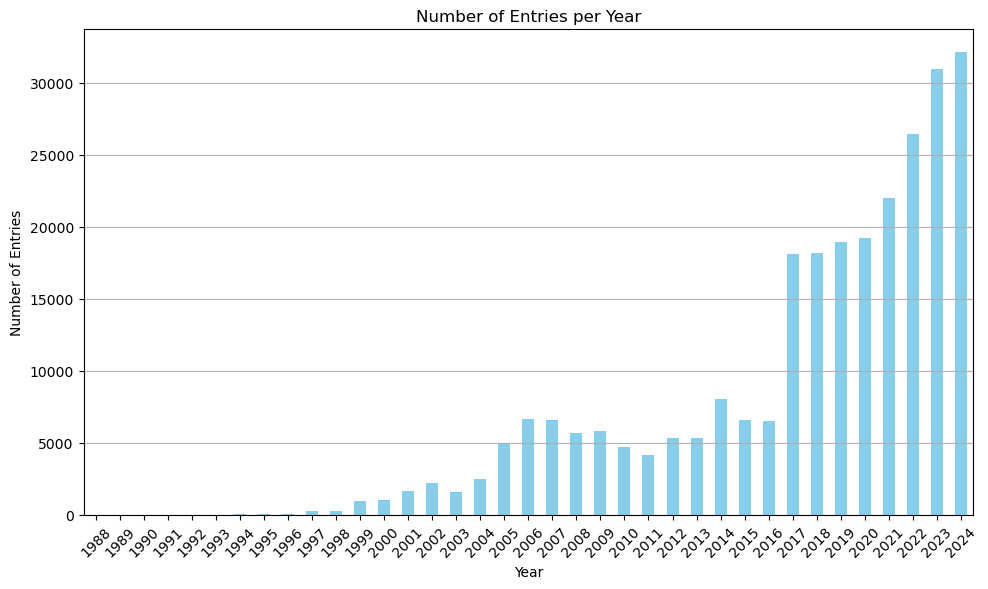

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# csv_data = pd.read_csv('your_file.csv')  # Load your data

# Ensure the Published_Date column is in datetime format
cve_data['Published_Date'] = pd.to_datetime(cve_data['Published_Date'], errors='coerce')

# Extract the year from the Published_Date
cve_data['Year'] = cve_data['Published_Date'].dt.year

# Count the number of entries per year
entries_per_year = cve_data['Year'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
entries_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
# Display the columns in the DataFrame
print(cve_data.columns.tolist())


['CVE_ID', 'ASSIGNER', 'Description', 'Published_Date', 'Last_Modified_Date', 'CVSS_v3_Base_Score', 'CVSS_v3_Vector_String', 'Confidentiality_Impact_v3', 'Integrity_Impact_v3', 'Availability_Impact_v3', 'Exploitability_Score_v3', 'Impact_Score_v3', 'CVSS_v2_Base_Score', 'CVSS_v2_Vector_String', 'Access_Vector_v2', 'Access_Complexity_v2', 'Confidentiality_Impact_v2', 'Integrity_Impact_v2', 'Availability_Impact_v2', 'Exploitability_Score_v2', 'Configurations', 'Reference_Data', 'Year', 'Combined_Base_Score', 'Combined_Exploitability_Score']


In [79]:
import pandas as pd

# Example DataFrame (use your actual DataFrame here)
# csv_data = pd.read_csv('your_dataset.csv')

def combine_scores(v2, v3):
    # Check if both values are numeric
    if isinstance(v2, (int, float)) and isinstance(v3, (int, float)):
        return (v2 + v3) / 2  # Average the scores
    elif pd.notnull(v2) and pd.notnull(v3):  # Both values exist
        return v2  # Or some strategy to choose between them
    elif pd.notnull(v2):  # Only v2 exists
        return v2
    elif pd.notnull(v3):  # Only v3 exists
        return v3
    return None  # If both are null

# Combine scores for numerical columns
cve_data['Combined_Base_Score'] = cve_data.apply(lambda x: combine_scores(x['CVSS_v2_Base_Score'], x['CVSS_v3_Base_Score']), axis=1)
cve_data['Combined_Exploitability_Score'] = cve_data.apply(lambda x: combine_scores(x['Exploitability_Score_v2'], x['Exploitability_Score_v3']), axis=1)

# Combine categorical columns (example)
def combine_categorical(cat2, cat3):
    # Prioritize v3 values if both exist; otherwise, return the existing value
    if pd.notnull(cat3):
        return cat3
    return cat2 if pd.notnull(cat2) else None

cve_data['Combined_Confidentiality_Impact'] = cve_data.apply(lambda x: combine_categorical(x['Confidentiality_Impact_v2'], x['Confidentiality_Impact_v3']), axis=1)
cve_data['Combined_Integrity_Impact'] = cve_data.apply(lambda x: combine_categorical(x['Integrity_Impact_v2'], x['Integrity_Impact_v3']), axis=1)
cve_data['Combined_Availability_Impact'] = cve_data.apply(lambda x: combine_categorical(x['Availability_Impact_v2'], x['Availability_Impact_v3']), axis=1)

# Display the first few rows to see the new combined columns
print(cve_data[['Combined_Base_Score', 'Combined_Exploitability_Score', 
                 'Combined_Confidentiality_Impact', 'Combined_Integrity_Impact', 
                 'Combined_Availability_Impact']].head())


   Combined_Base_Score  Combined_Exploitability_Score  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

  Combined_Confidentiality_Impact Combined_Integrity_Impact  \
0                            NONE                      NONE   
1                         PARTIAL                   PARTIAL   
2                         PARTIAL                   PARTIAL   
3                            NONE                   PARTIAL   
4                            NONE                   PARTIAL   

  Combined_Availability_Impact  
0                      PARTIAL  
1                         NONE  
2                         NONE  
3                         NONE  
4                         NONE  


In [87]:
columns_to_remove = [
    'CVSS_v2_Base_Score', 'CVSS_v3_Base_Score',
    'Exploitability_Score_v2', 'Exploitability_Score_v3',
    'Confidentiality_Impact_v2', 'Confidentiality_Impact_v3',
    'Integrity_Impact_v2', 'Integrity_Impact_v3',
    'Availability_Impact_v2', 'Availability_Impact_v3'
]

cve_data.drop(columns=columns_to_remove, inplace=True)

# Display the remaining columns
remaining_columns = cve_data.columns.tolist()
print("Remaining columns after removing transformed ones:")
print(remaining_columns)


Remaining columns after removing transformed ones:
['CVE_ID', 'ASSIGNER', 'Description', 'Published_Date', 'Last_Modified_Date', 'CVSS_v3_Vector_String', 'Impact_Score_v3', 'CVSS_v2_Vector_String', 'Access_Vector_v2', 'Access_Complexity_v2', 'Configurations', 'Reference_Data', 'Year', 'Combined_Base_Score', 'Combined_Exploitability_Score', 'Combined_Confidentiality_Impact', 'Combined_Integrity_Impact', 'Combined_Availability_Impact']


In [111]:
cve_data.drop(columns=['CVSS_v2_Vector_String', 'CVSS_v3_Vector_String'], inplace=True)


In [115]:
# Define a function to rename columns based on the criteria
def rename_columns(column_name):
    # Remove 'Combined_' from the beginning if present
    new_name = column_name.replace('Combined_', '')
    
    # Always remove the version suffix if both versions exist or only one exists
    new_name = new_name.replace('_v2', '').replace('_v3', '')
    
    return new_name

# Rename the relevant columns
cve_data.rename(columns={col: rename_columns(col) for col in cve_data.columns}, inplace=True)

# Display the updated column names
print(cve_data.columns.tolist())


['CVE_ID', 'ASSIGNER', 'Description', 'Published_Date', 'Last_Modified_Date', 'Impact_Score', 'Access_Vector', 'Access_Complexity', 'Configurations', 'Reference_Data', 'Year', 'Base_Score', 'Exploitability_Score', 'Confidentiality_Impact', 'Integrity_Impact', 'Availability_Impact']


In [117]:
missing_data = cve_data.isnull().sum()
print(missing_data)


CVE_ID                         0
ASSIGNER                      10
Description                    0
Published_Date                 0
Last_Modified_Date             0
Impact_Score              104506
Access_Vector              86611
Access_Complexity          86611
Configurations                 0
Reference_Data                 0
Year                           0
Base_Score                159601
Exploitability_Score      159601
Confidentiality_Impact     31516
Integrity_Impact           31516
Availability_Impact        31516
dtype: int64


In [133]:
import pandas as pd

# Assuming cve_data is your DataFrame

# List of columns to check for nulls
columns_to_check = [
    'Impact_Score',
    'Access_Vector',
    'Access_Complexity',
    'Base_Score',
    'Exploitability_Score',
    'Confidentiality_Impact',
    'Integrity_Impact',
    'Availability_Impact'
]

# Drop rows where all specified columns have null values
cve_data_cleaned = cve_data.dropna(subset=columns_to_check, how='all')

# Display the shape of the DataFrame before and after cleaning
print(f"Original shape: {cve_data.shape}")
print(f"Cleaned shape: {cve_data_cleaned.shape}")

# Optionally, you can assign the cleaned DataFrame back to the original variable
cve_data = cve_data_cleaned


Original shape: (266688, 16)
Cleaned shape: (235172, 16)


In [135]:
missing_data = cve_data.isnull().sum()
print(missing_data)


CVE_ID                         0
ASSIGNER                       5
Description                    0
Published_Date                 0
Last_Modified_Date             0
Impact_Score               72990
Access_Vector              55095
Access_Complexity          55095
Configurations                 0
Reference_Data                 0
Year                           0
Base_Score                128085
Exploitability_Score      128085
Confidentiality_Impact         0
Integrity_Impact               0
Availability_Impact            0
dtype: int64


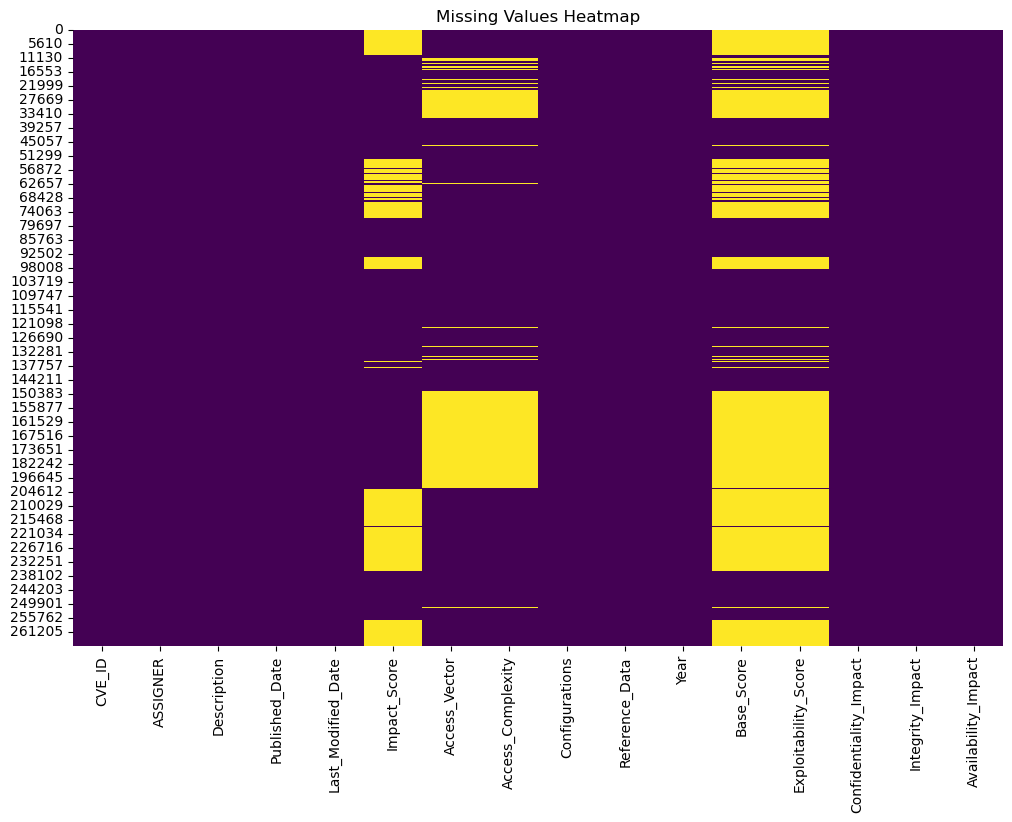

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting missing values
plt.figure(figsize=(12, 8))
sns.heatmap(cve_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [145]:
import pandas as pd

# Assuming cve_data is your original DataFrame
# Create a new DataFrame without any rows that contain null values
cve_data_cleaned = cve_data.dropna()

# Check the shape of the new DataFrame to see how many rows remain
print(f"Original DataFrame shape: {cve_data.shape}")
print(f"Cleaned DataFrame shape: {cve_data_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
print(cve_data_cleaned.head())


Original DataFrame shape: (235172, 16)
Cleaned DataFrame shape: (107087, 16)
            CVE_ID                    ASSIGNER  \
196  CVE-2011-0199  product-security@apple.com   
217  CVE-2011-0220  product-security@apple.com   
370  CVE-2011-0428               cve@mitre.org   
408  CVE-2011-0467       security@opentext.com   
410  CVE-2011-0469       security@opentext.com   

                                           Description  \
196  The Certificate Trust Policy component in Appl...   
217  Apple Bonjour before 2011 allows a crash via a...   
370  Cross Site Scripting (XSS) in ikiwiki before 3...   
408  A vulnerability in the listing of available so...   
410  Code injection in openSUSE when running some s...   

               Published_Date        Last_Modified_Date  Impact_Score  \
196 2011-06-24 20:55:00+00:00 2024-02-09 03:18:00+00:00           3.6   
217 2020-02-05 20:15:00+00:00 2020-02-07 19:24:00+00:00           3.6   
370 2019-10-29 19:15:00+00:00 2019-11-01 14:55:00+00:0

In [147]:
cve_data_cleaned.head()

,CVE_ID,ASSIGNER,Description,Published_Date,Last_Modified_Date,Impact_Score,Access_Vector,Access_Complexity,Configurations,Reference_Data,Year,Base_Score,Exploitability_Score,Confidentiality_Impact,Integrity_Impact,Availability_Impact
196,CVE-2011-0199,product-security@apple.com,The Certificate Trust Policy component in Appl...,2011-06-24 20:55:00+00:00,2024-02-09 03:18:00+00:00,3.6,NETWORK,MEDIUM,['cpe:2.3:o:apple:mac_os_x_server:*:*:*:*:*:*:...,"['http://support.apple.com/kb/HT4723', 'http:/...",2011,5.85,5.40,NONE,HIGH,NONE
217,CVE-2011-0220,product-security@apple.com,Apple Bonjour before 2011 allows a crash via a...,2020-02-05 20:15:00+00:00,2020-02-07 19:24:00+00:00,3.6,LOCAL,LOW,['cpe:2.3:a:apple:bonjour:*:*:*:*:*:*:*:*'],['https://opensource.apple.com/source/mDNSResp...,2020,5.20,2.85,NONE,NONE,HIGH
370,CVE-2011-0428,cve@mitre.org,Cross Site Scripting (XSS) in ikiwiki before 3...,2019-10-29 19:15:00+00:00,2019-11-01 14:55:00+00:00,2.7,NETWORK,MEDIUM,['cpe:2.3:a:ikiwiki:ikiwiki:*:*:*:*:*:*:*:*'],['https://security-tracker.debian.org/tracker/...,2019,5.20,5.70,LOW,LOW,NONE
408,CVE-2011-0467,security@opentext.com,A vulnerability in the listing of available so...,2018-06-07 21:29:00+00:00,2023-11-07 02:06:00+00:00,5.9,NETWORK,LOW,['cpe:2.3:a:suse:studio_onsite_appliance:*:*:*...,['https://bugzilla.suse.com/show_bug.cgi?id=67...,2018,7.65,5.40,HIGH,HIGH,HIGH
410,CVE-2011-0469,security@opentext.com,Code injection in openSUSE when running some s...,2017-08-17 16:29:00+00:00,2023-11-07 02:06:00+00:00,5.9,NETWORK,LOW,['cpe:2.3:o:suse:opensuse:-:*:*:*:*:*:*:*'],['https://bugzilla.suse.com/show_bug.cgi?id=67...,2017,9.40,6.95,HIGH,HIGH,HIGH


In [149]:
cve_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107087 entries, 196 to 266687
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   CVE_ID                  107087 non-null  object             
 1   ASSIGNER                107087 non-null  object             
 2   Description             107087 non-null  object             
 3   Published_Date          107087 non-null  datetime64[ns, UTC]
 4   Last_Modified_Date      107087 non-null  datetime64[ns, UTC]
 5   Impact_Score            107087 non-null  float64            
 6   Access_Vector           107087 non-null  object             
 7   Access_Complexity       107087 non-null  object             
 8   Configurations          107087 non-null  object             
 9   Reference_Data          107087 non-null  object             
 10  Year                    107087 non-null  int32              
 11  Base_Score              10708

In [155]:
# Save the cleaned DataFrame to a CSV file
cve_data_cleaned.to_csv('cve_data_cleaned.csv', index=False)
